#                                       Census Income
##                                            Project Description

#### By Gaurav Kumar
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: 
((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)).<br>
The prediction task is to determine whether a person makes over $50K a year.<br>

Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


In [1]:
import pandas as pd,seaborn as sns,matplotlib.pyplot as plt,numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("census_income.csv")

In [4]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


as we can see there is 32560 rows and 15 columns

this dataset contains two types of datatype int and object

#####  Data Integrity check

In [6]:
df.isin([' ?'," ","-"]).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [7]:
# first we can replace the "? value with np.NaN values"

df=df.replace(" ?",np.NaN)

In [8]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [9]:
# data integrity check

df.duplicated().sum()

24

as we can see there is 24 dupliacted type data we can remove it 

In [10]:
df.drop_duplicates(keep='last', inplace=True)

In [11]:
# now check for the duplucate entry again
df.duplicated().sum()

0

In [12]:
# lets check for the null values in the columns

df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     582
Income               0
dtype: int64

as we can see ther is missing values present in threee columns which are:

workclass having 1836

occuoation having 1843

native_country having 582 missing values respectively

In [13]:
# lets check how much percetn of missing values are 
(df.isnull().sum()/len(df))*100

Age               0.000000
Workclass         5.642980
Fnlwgt            0.000000
Education         0.000000
Education_num     0.000000
Marital_status    0.000000
Occupation        5.664495
Relationship      0.000000
Race              0.000000
Sex               0.000000
Capital_gain      0.000000
Capital_loss      0.000000
Hours_per_week    0.000000
Native_country    1.788788
Income            0.000000
dtype: float64

<Axes: >

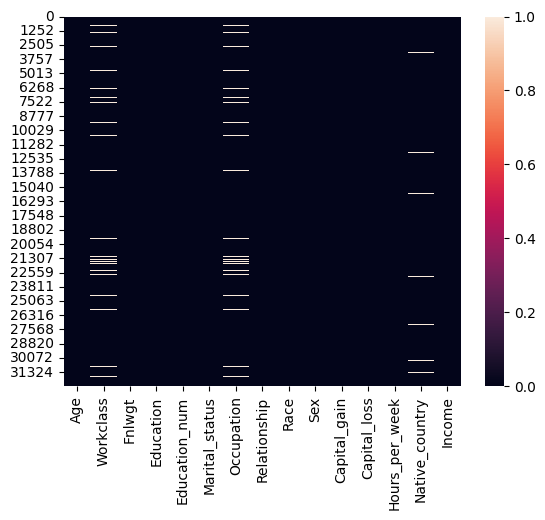

In [14]:
# now check the missing values on heatmap 

sns.heatmap(df.isnull())

##### now we can fill those mising values corrosponds to check their datatype if it be categorical then mode will be applied and if the data is numerical then mean and median will be applied 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       30700 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      30693 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  31954 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [16]:
# Sort columns by datatypes
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week'], object: ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']}

as we can see the data can be sorted according with their datatypes

we can make new list for those

In [17]:
num=['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']
cat=['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']

as we can see that occupation ,workclass and native country comes under the categorical data type so it is good to apply mode operation for filling the missing values

In [18]:
df['Workclass'].fillna(df['Workclass'].mode()[0],inplace=True)
df['Occupation'].fillna(df['Occupation'].mode()[0],inplace=True)
df['Native_country'].fillna(df['Native_country'].mode()[0],inplace=True)

In [19]:
# now check again the dataset for the missing values and plot the heatmap

df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

as we can see there is no missing values present now plot the heat map

<Axes: >

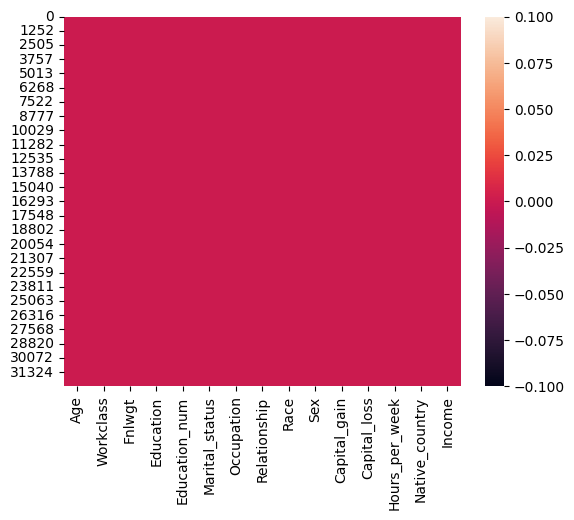

In [20]:
sns.heatmap(df.isnull())

ohh great we cleaned the dataset very well now lets move on further steps

### Statistics steps

<Axes: >

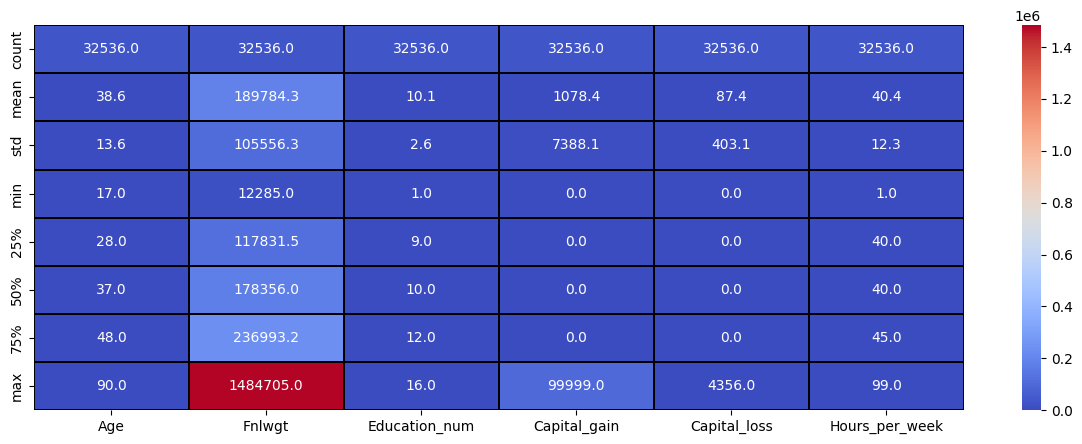

In [21]:
plt.figure(figsize=(15,5))
sns.heatmap(df.describe(),annot=True,fmt='0.1f',cmap='coolwarm',linewidth=0.01,linecolor='black')

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32536.0,38.585536,13.638193,17.0,28.0,37.0,48.00,90.0
Fnlwgt,32536.0,189784.298992,105556.258211,12285.0,117831.5,178356.0,236993.25,1484705.0
Education_num,32536.0,10.081725,2.571622,1.0,9.0,10.0,12.00,16.0
Capital_gain,32536.0,1078.410069,7388.068465,0.0,0.0,0.0,0.00,99999.0
Capital_loss,32536.0,87.370912,403.107737,0.0,0.0,0.0,0.00,4356.0
Hours_per_week,32536.0,40.440343,12.347079,1.0,40.0,40.0,45.00,99.0


from the above observation we can see that 

1) all the columns having the same count means their is no missing values
2) the age is between 17 to 90 
3) Fnlwgt columns having min values is 12285 and the max in 1484705
4) we can see that the education years lies in between 1to 16 with mean of 10 years 
5) hours_per_week lies in between 1 to 99 with the mean of 50

In [23]:
# now exploring the categorical column we can count the values 

for i in cat:
    print(df[i].value_counts())
    print('\n')
    print("*"*100)

Workclass
 Private             24509
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64


****************************************************************************************************
Education
 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: count, dtype: int64


****************************************************************************************************
Marital_status
 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 

### EDA 

frist step to analyse our target variable which is inccome

lets plot a pei and bar plot for income column

Text(0.5, 1.0, 'Income Distribution')

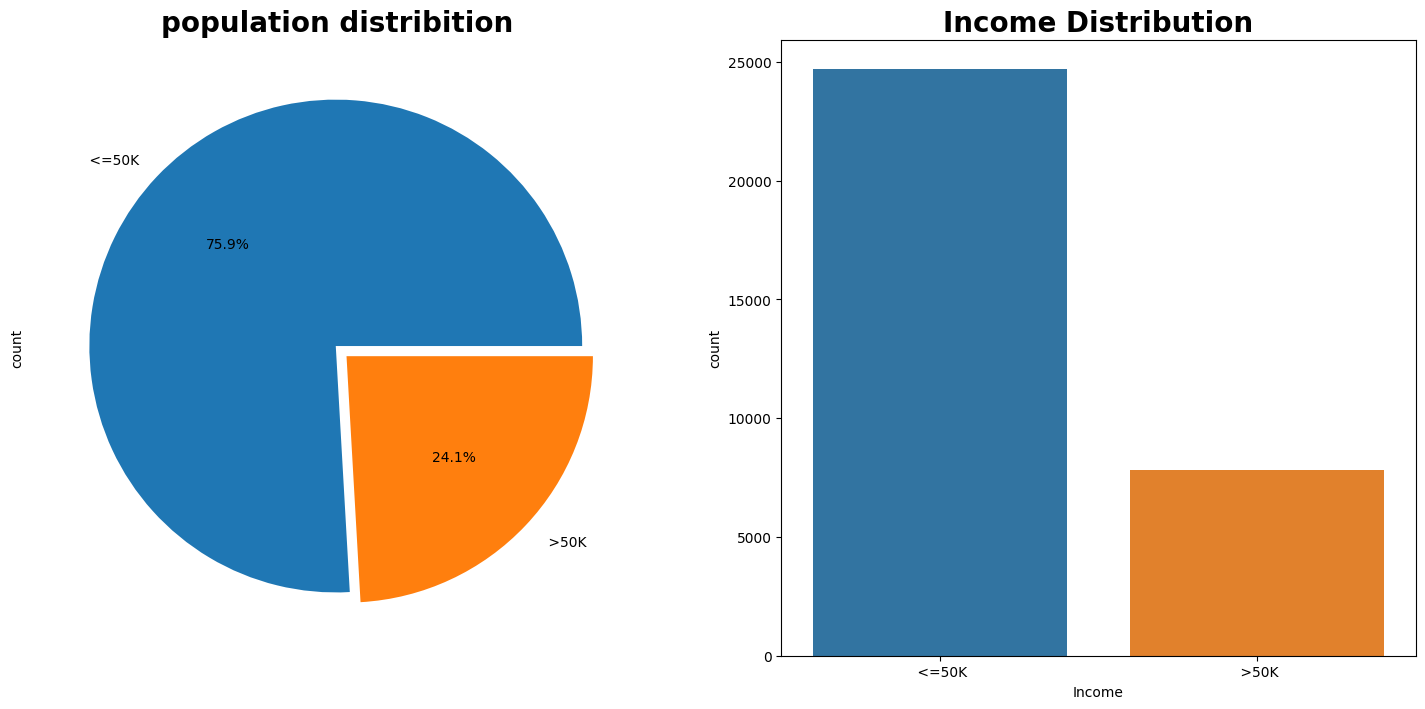

In [24]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Income'].value_counts().plot.pie(explode=[0.01,0.05],autopct='%3.1f%%',ax=ax[0])
ax[0].set_title("population distribition",fontsize=20,fontweight='bold')
sns.countplot(x='Income',data=df,ax=ax[1])
ax[1].set_title("Income Distribution",fontsize=20,fontweight='bold')

Observation :
75.9 % population (24697 peoples) have income less than 50K.

Our task is to predict income and we see that target variable income is imbalanced.

Let check each feature against Target variable to gain more insight

##  workclass

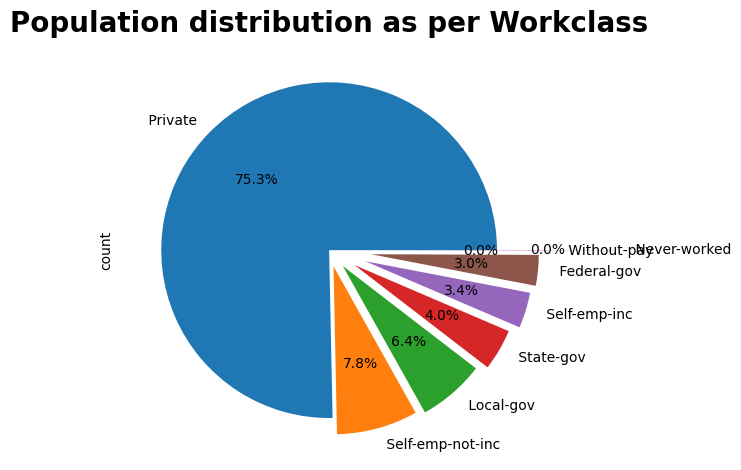

In [25]:
df['Workclass'].value_counts().plot.pie(autopct='%2.1f%%',explode=[0,0.1,0.125,0.175,0.225,0.25,0.3,0.7])
plt.title('Population distribution as per Workclass', fontsize=20,fontweight ='bold')
plt.tight_layout()
plt.show()

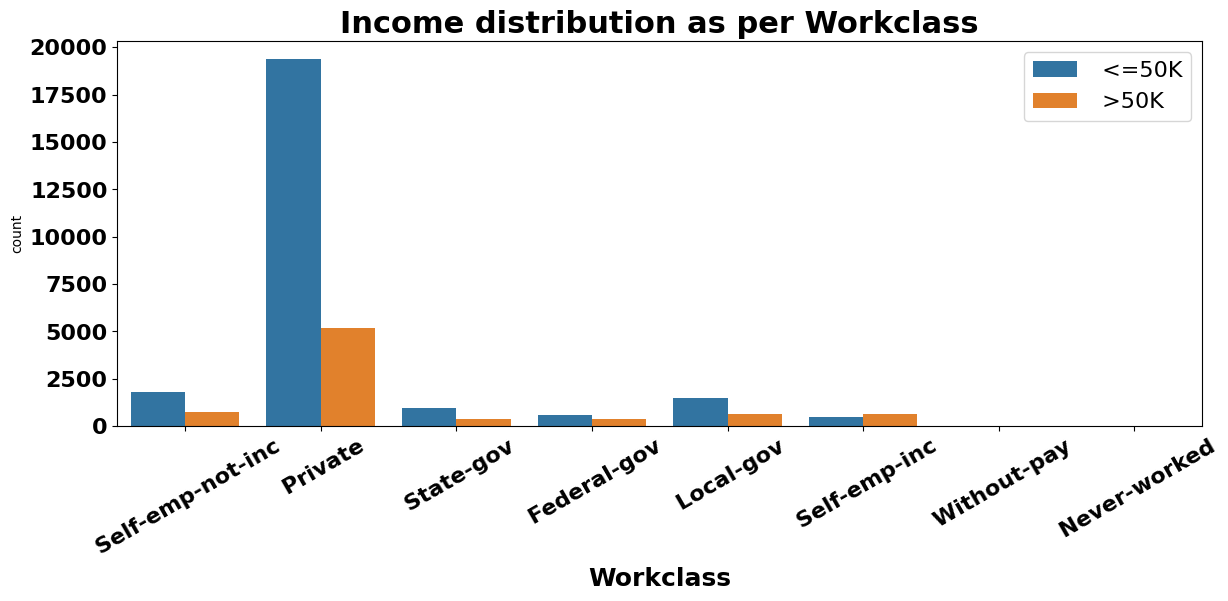

In [26]:
# income distribution as per workclass

plt.figure(figsize=(14,5))
p = sns.countplot(x='Workclass',data=df,hue='Income')
plt.title('Income distribution as per Workclass', fontsize=22, fontweight='bold')
p.set_xlabel('Workclass',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold',rotation=30)
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=16)
plt.show()

In [27]:
pd.crosstab([df.Workclass],[df.Income],margins=True)

Income,<=50K,>50K,All
Workclass,,,
Federal-gov,589,371,960
Local-gov,1476,617,2093
Never-worked,7,0,7
Private,19357,5152,24509
Self-emp-inc,494,622,1116
Self-emp-not-inc,1816,724,2540
State-gov,944,353,1297
Without-pay,14,0,14
All,24697,7839,32536


## Education

<Axes: ylabel='count'>

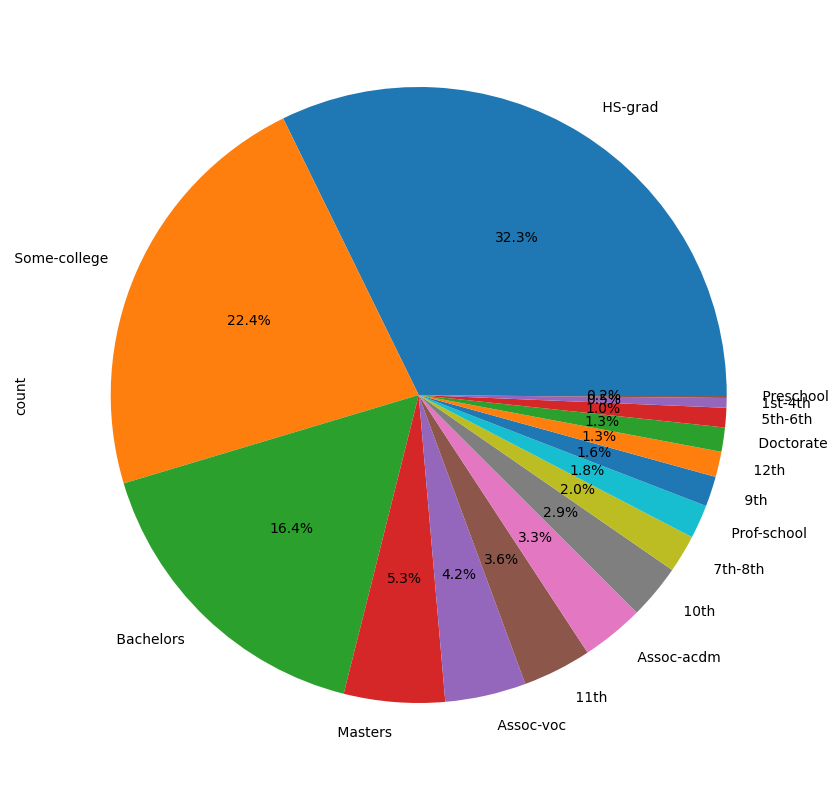

In [28]:
plt.figure(figsize=(10,10))
df['Education'].value_counts().plot.pie(autopct="%2.1f%%")

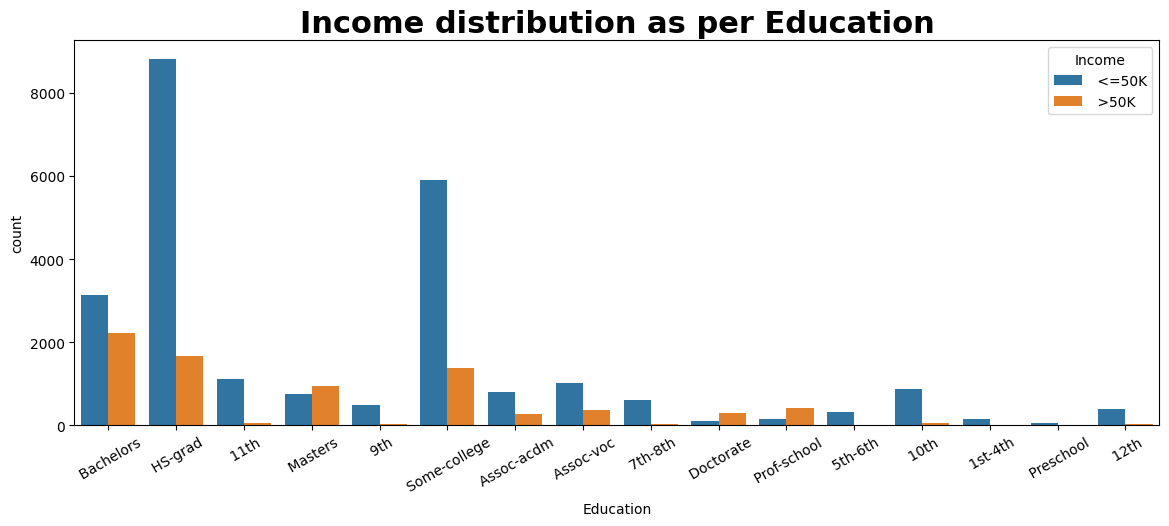

In [29]:
# income vs education
plt.figure(figsize=(14,5))
plt.title('Income distribution as per Education', fontsize=22, fontweight='bold')
p.set_xlabel('Education',fontsize=18,fontweight ='bold')
sns.countplot(x='Education',data=df,hue='Income')
plt.xticks(rotation=30)
plt.show()

Observation:

Out of all population 32.3% people with HS-Grad education level.

5.3 % people with masters and 1.3 % population is Doctorate degree holder. Highly educated & intellactual people belongs to this category.

There are very handful people who earn more than 50 K dollars having education below 12th level.

Maximum number of people who earn more than 50K dollars are Bachelors degree holder.

Here comes interesting observation about income of highly educated people. In case of people belonging to Masters, Doctorate and Prof-School category in the education level, the number people earning more than 50K dollars an year outnumber than the number of people earning less than it.

In case of Assoc-acad or Assoc-voc, there are a few people who earn more than 50K dollars an year!

In [30]:
pd.crosstab(df['Education'],df["Workclass"], margins=True)

Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
Education,,,,,,,,,
10th,6,31,2,795,19,67,13,0,933
11th,9,36,1,1041,14,60,14,0,1175
12th,5,19,0,373,7,19,10,0,433
1st-4th,0,4,0,146,2,13,1,0,166
5th-6th,1,9,0,295,4,19,4,0,332
7th-8th,2,28,1,495,14,94,10,1,645
9th,3,23,0,438,10,34,6,0,514
Assoc-acdm,55,88,0,776,35,71,41,1,1067
Assoc-voc,38,86,0,1066,38,108,46,0,1382


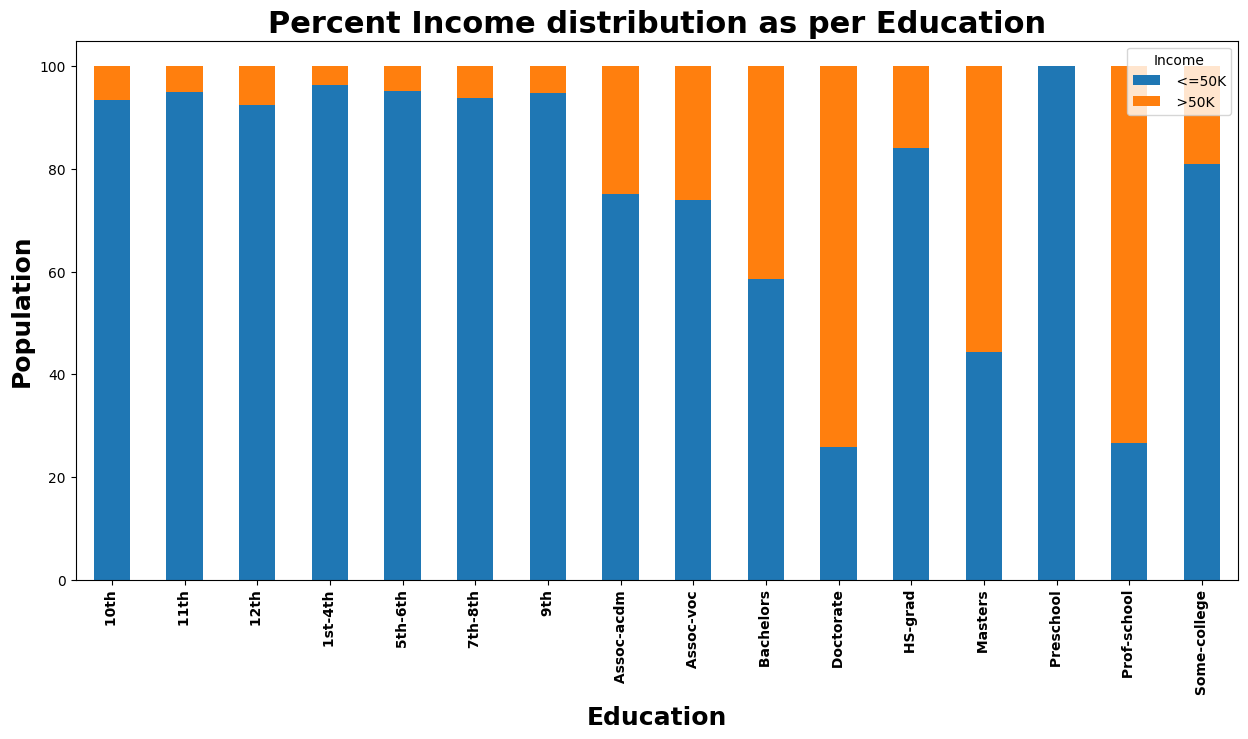

In [31]:
# Percentage Income distribution in terms of Education
table = pd.crosstab(df['Education'], df['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,7))
plt.title('Percent Income distribution as per Education', fontsize=22, fontweight='bold')
plt.xlabel('Education', fontsize=18,fontweight='bold')
plt.ylabel('Population', fontsize=18,fontweight='bold')
plt.xticks(fontweight ='bold')
plt.show()

Observation:

In terms of percentage 75 % of Doctorate people earn more than 50K dollars an years, followed by Prof- school.

So, Highly earning people most of times comes with Masters or Doctorate education background.

From crosstab we can see that private sector is highest recuriter for HS-Grad with 8305 people.

Private sector is also major recurtier of highly eduacated people with masters, doctorate followed by local goverment.

## marital_status

In [32]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


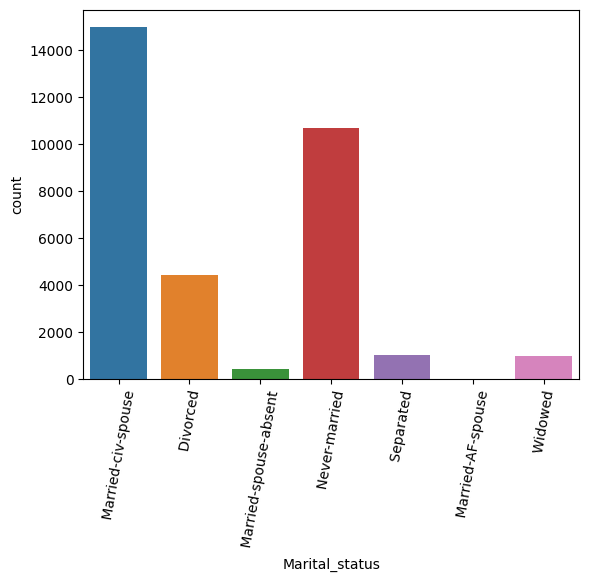

In [33]:
sns.countplot(x='Marital_status',data=df)
plt.xticks(rotation=80)
plt.show()


<Axes: ylabel='count'>

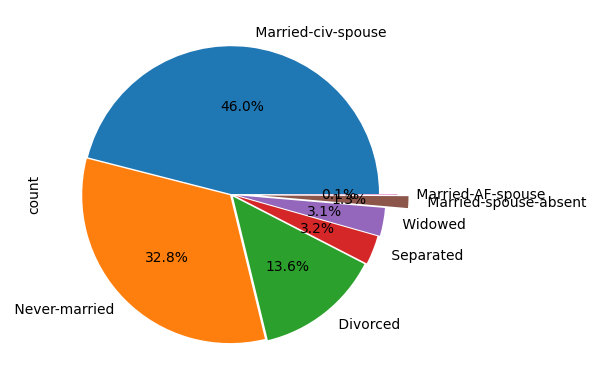

In [34]:
df['Marital_status'].value_counts().plot.pie(explode=[0.001,0.010,0.020,0.030,0.045,0.200,0.125],autopct='%2.1f%%')

Text(0.5, 1.0, 'Marital status vs income')

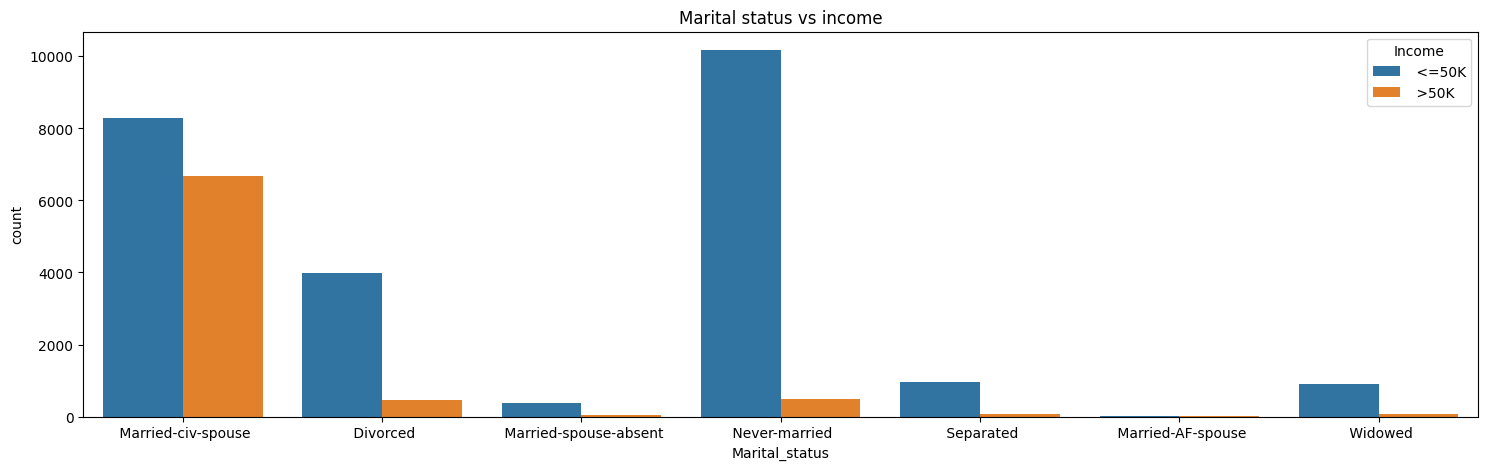

In [35]:
plt.figure(figsize=(18,5))
sns.countplot(x='Marital_status',hue='Income',data=df)
plt.title("Marital status vs income")

In [36]:
pd.crosstab([df.Marital_status],[df.Income],margins=True)

Income,<=50K,>50K,All
Marital_status,,,
Divorced,3978,463,4441
Married-AF-spouse,13,10,23
Married-civ-spouse,8280,6690,14970
Married-spouse-absent,384,34,418
Never-married,10175,491,10666
Separated,959,66,1025
Widowed,908,85,993
All,24697,7839,32536


<Axes: xlabel='Marital_status'>

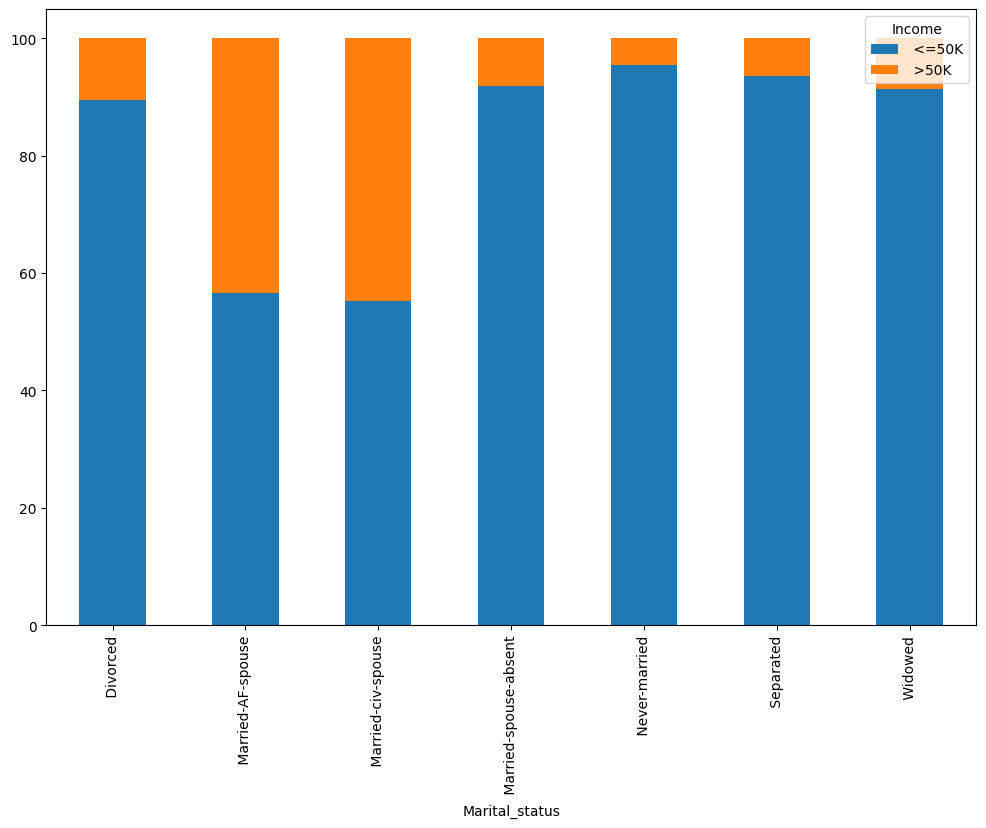

In [37]:
table = pd.crosstab(df['Marital_status'], df['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(12,8))

Text(0.5, 1.0, 'Marital status vs income')

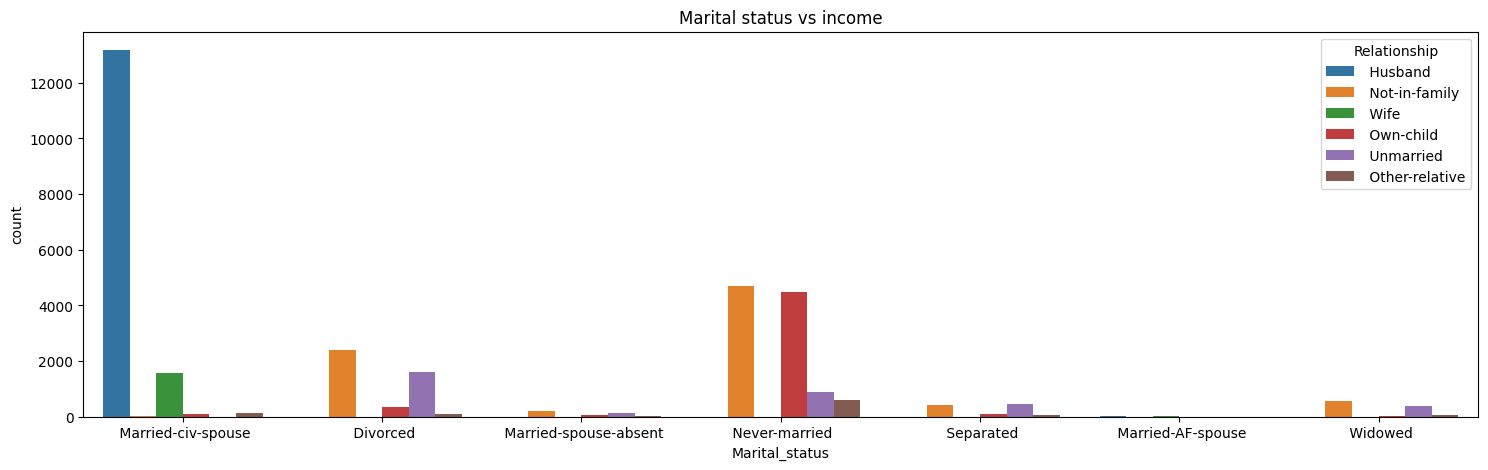

In [38]:
plt.figure(figsize=(18,5))

sns.countplot(x='Marital_status',hue='Relationship',data=df)
plt.title("Marital status vs income")

In [39]:
pd.crosstab([df.Marital_status],[df.Income],margins=True)

Income,<=50K,>50K,All
Marital_status,,,
Divorced,3978,463,4441
Married-AF-spouse,13,10,23
Married-civ-spouse,8280,6690,14970
Married-spouse-absent,384,34,418
Never-married,10175,491,10666
Separated,959,66,1025
Widowed,908,85,993
All,24697,7839,32536


In [40]:

pd.crosstab(df['Marital_status'],df['Relationship'])

Relationship,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
Marital_status,,,,,,
Divorced,0,2403,110,328,1600,0
Married-AF-spouse,9,0,1,1,0,12
Married-civ-spouse,13178,17,124,95,0,1556
Married-spouse-absent,0,211,32,45,130,0
Never-married,0,4693,611,4481,881,0
Separated,0,420,55,99,451,0
Widowed,0,547,48,15,383,0


<Axes: xlabel='Marital_status', ylabel='count'>

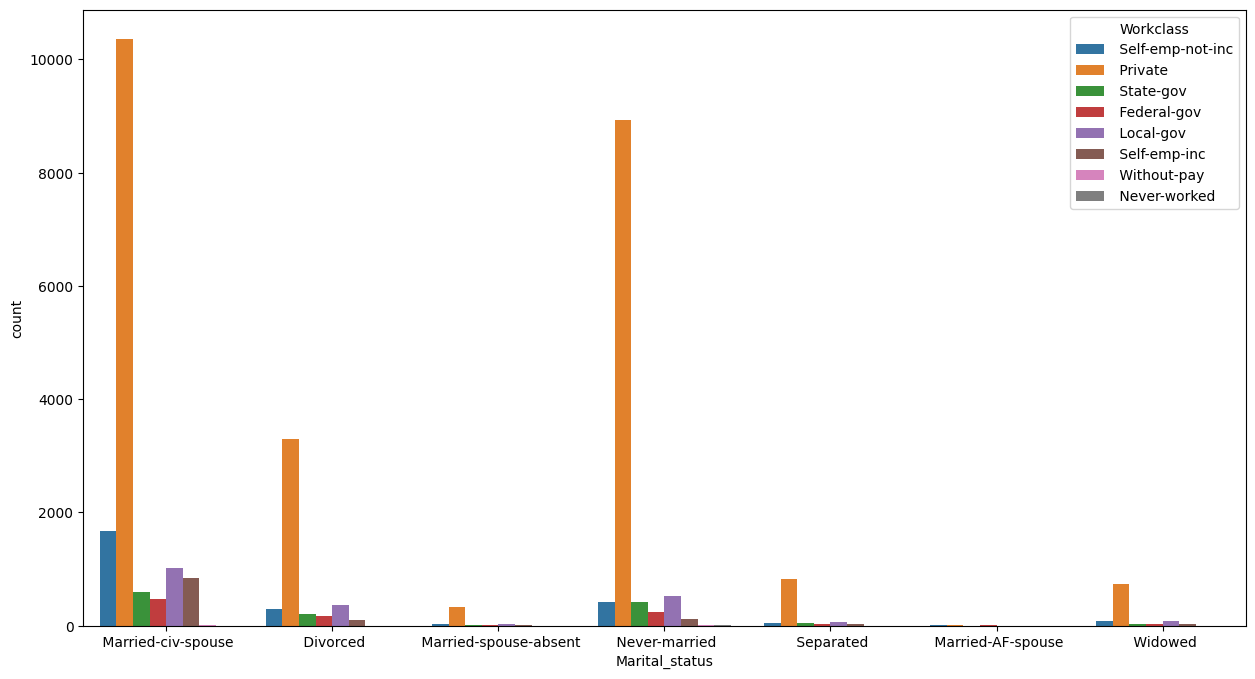

In [41]:
plt.figure(figsize=(15,8))
sns.countplot(x='Marital_status',hue='Workclass',data=df)

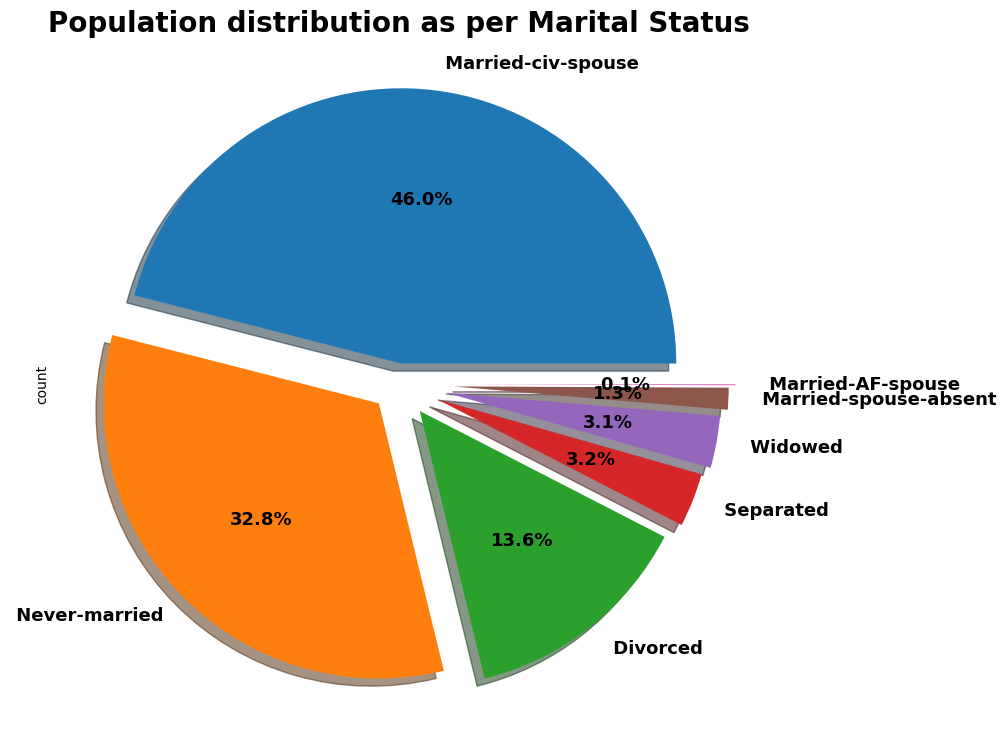

In [42]:
plt.figure(figsize=(10,10))
df['Marital_status'].value_counts().plot.pie(autopct='%2.1f%%', explode=[0.075,0.1,0.125,0.15,0.175,0.2,0.225],
                                             textprops ={'fontsize':13,'fontweight':'bold'},shadow=True)
plt.title('Population distribution as per Marital Status', fontsize=20,fontweight ='bold')
plt.tight_layout()
plt.show()

### Occupation 

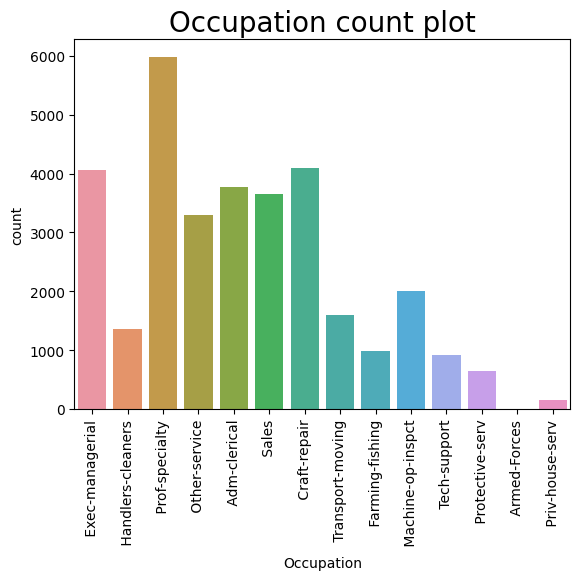

In [43]:
plt.title("Occupation count plot",fontsize=20)
sns.countplot(x='Occupation',data=df)
plt.xticks(rotation=90)
plt.show()

<Axes: title={'center': 'Population distribution as per Occupation'}, ylabel='count'>

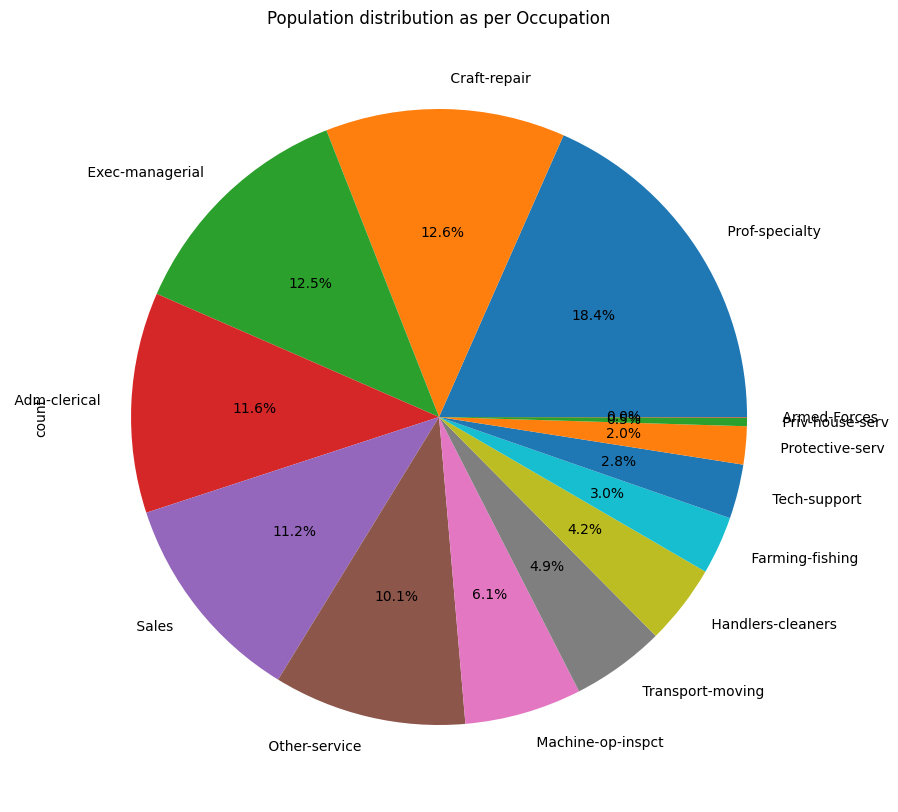

In [44]:
plt.figure(figsize=(10,10))
plt.title("Population distribution as per Occupation")
df['Occupation'].value_counts().plot.pie(autopct='%2.1f%%')

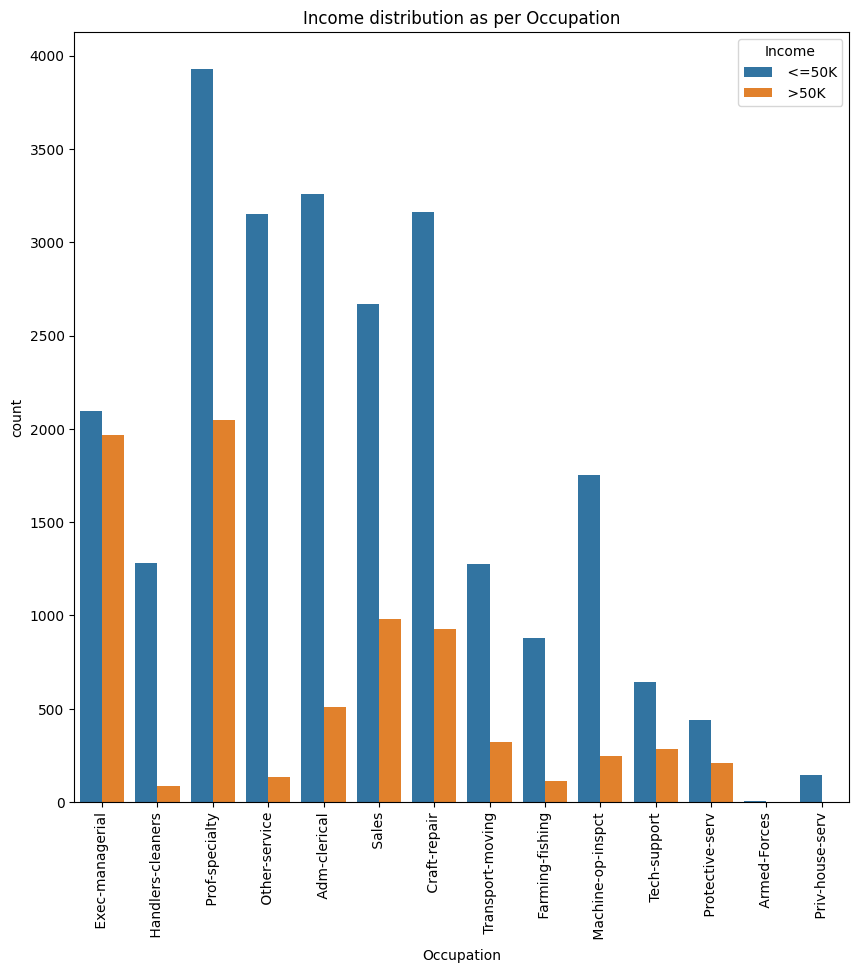

In [45]:
plt.figure(figsize=(10,10))
plt.title("Income distribution as per Occupation")
sns.countplot(x='Occupation',data=df,hue='Income')
plt.xticks(rotation=90)
plt.show()

Observation :
    
Exec-managerial role are equally likely to earn more than 50K dollars an year.

Peoples working in Arm- Forces, Farming-fishing, Machine-op-inspect, Other-service, Adm-clerical, Handlers-cleaners are very less likely to earn more than 50K dollars an year.

Around 25% of the people working in Sales earn more than 50K dollars an year.


In [46]:
pd.crosstab([df.Occupation],[df.Income],margins=True)

Income,<=50K,>50K,All
Occupation,,,
Adm-clerical,3260,507,3767
Armed-Forces,8,1,9
Craft-repair,3165,929,4094
Exec-managerial,2097,1968,4065
Farming-fishing,877,115,992
Handlers-cleaners,1283,86,1369
Machine-op-inspct,1751,249,2000
Other-service,3154,137,3291
Priv-house-serv,146,1,147


Observation :

Prof-Speciality position with maximum 2049 peoples followed by Exec-managerial position with 1968 people leads chart for greater than 50K dollars an year.

If we talk in term of percentage probablity Exective Managerial position have 50% chances to lead in Greater than 50K dollars Club.

There's close to 33% probablity for an adult in Prof-specialty to earn more than 50K dollars an year.
- Minimum chances for Greater than 50K Club comes from Private House Service occupation where 1/147 chance of getting more than 50K dollars an year.

Let check where these different occupation fit with respect to Work class through crosstab.

In [47]:
pd.crosstab([df.Occupation],[df.Workclass],margins=True)

Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
Occupation,,,,,,,,,
Adm-clerical,317,283,0,2831,31,50,252,3,3767
Armed-Forces,9,0,0,0,0,0,0,0,9
Craft-repair,64,146,0,3191,106,530,56,1,4094
Exec-managerial,180,214,0,2690,400,392,189,0,4065
Farming-fishing,8,29,0,453,51,430,15,6,992
Handlers-cleaners,23,47,0,1272,2,15,9,1,1369
Machine-op-inspct,14,12,0,1911,13,36,13,1,2000
Other-service,35,193,0,2736,27,175,124,1,3291
Priv-house-serv,0,0,0,147,0,0,0,0,147


###  Relationship 

<Axes: title={'center': 'Population distribution as per Relationship'}, ylabel='count'>

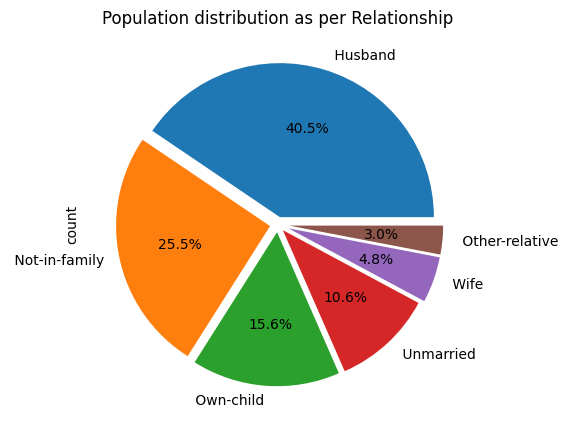

In [48]:
plt.figure(figsize=(5,5))
plt.title('Population distribution as per Relationship')
df['Relationship'].value_counts().plot.pie(autopct='%2.1f%%',explode=[0.05,0.05,0.05,0.05,0.075,0.075])

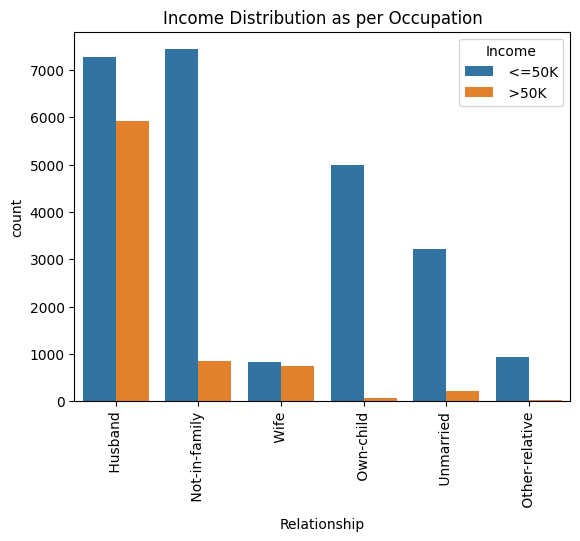

In [49]:
plt.title("Income Distribution as per Occupation")
sns.countplot(x='Relationship',hue='Income',data=df)
plt.xticks(rotation=90)
plt.show()

observation:

Wives are equally likely to earn more than 50K dollars an year.

For Husbands, although significant, there is less possibility of them to earn more than 50K dollars an year.

There are just a handful of Unmarried people earning more than 50K dollars an year.

#### Race

Text(0.5, 1.0, 'Race')

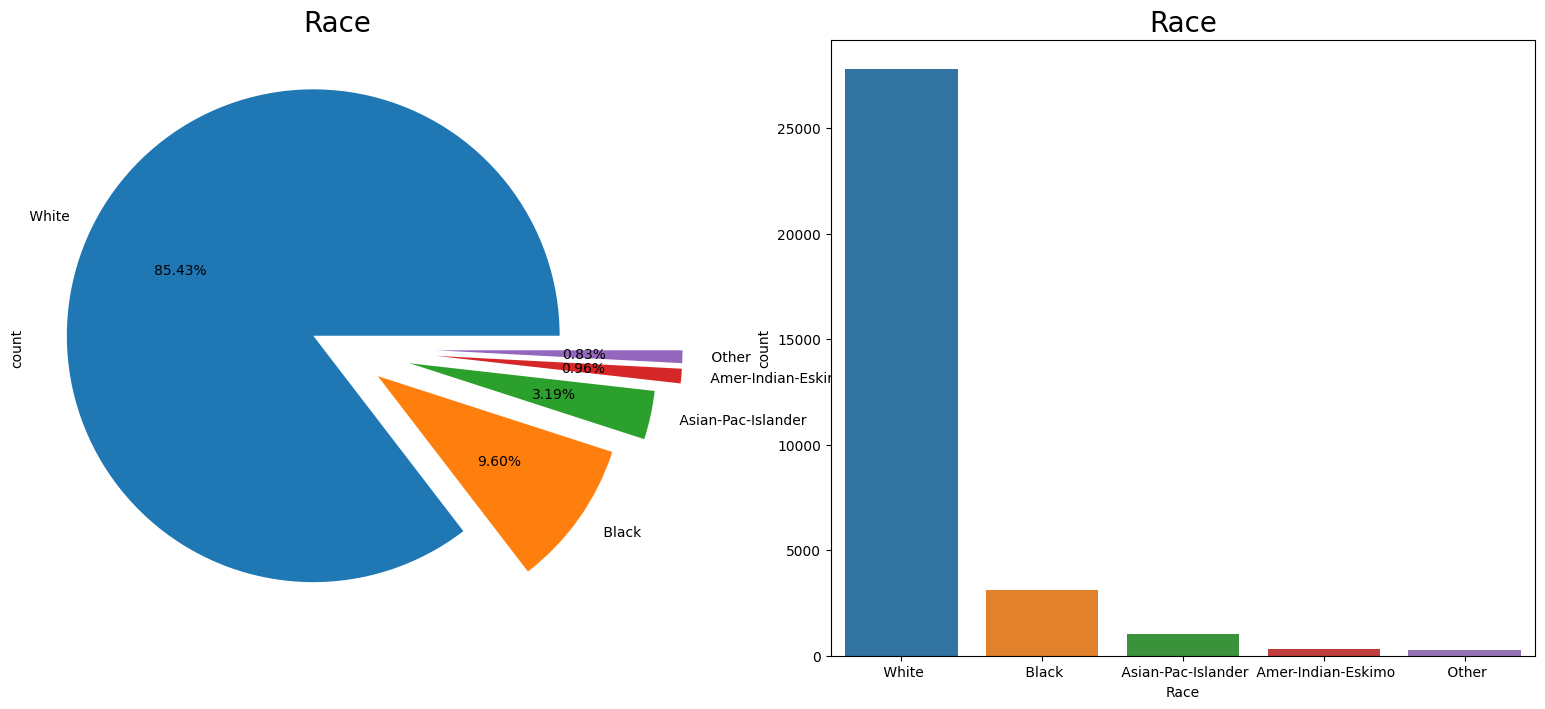

In [50]:
fig,ax=plt.subplots(1,2,figsize=(20,8))
df['Race'].value_counts().plot.pie(ax=ax[0],autopct='%1.2f%%',explode=[0.11,0.20,0.30,0.40,0.40])
ax[0].set_title("Race",fontsize=20)
sns.countplot(x='Race',data=df,ax=ax[1])
ax[1].set_title("Race",fontsize=20)

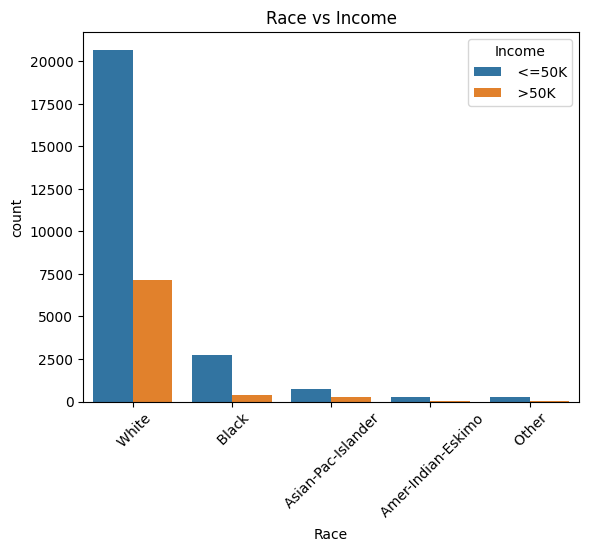

In [51]:
plt.title("Race vs Income")
sns.countplot(x='Race',hue='Income',data=df)
plt.xticks(rotation=45)
plt.show()

In [52]:
pd.crosstab([df.Race],[df.Income],margins=True)

Income,<=50K,>50K,All
Race,,,
Amer-Indian-Eskimo,275,36,311
Asian-Pac-Islander,762,276,1038
Black,2735,387,3122
Other,246,25,271
White,20679,7115,27794
All,24697,7839,32536


Text(0, 0.5, 'Population')

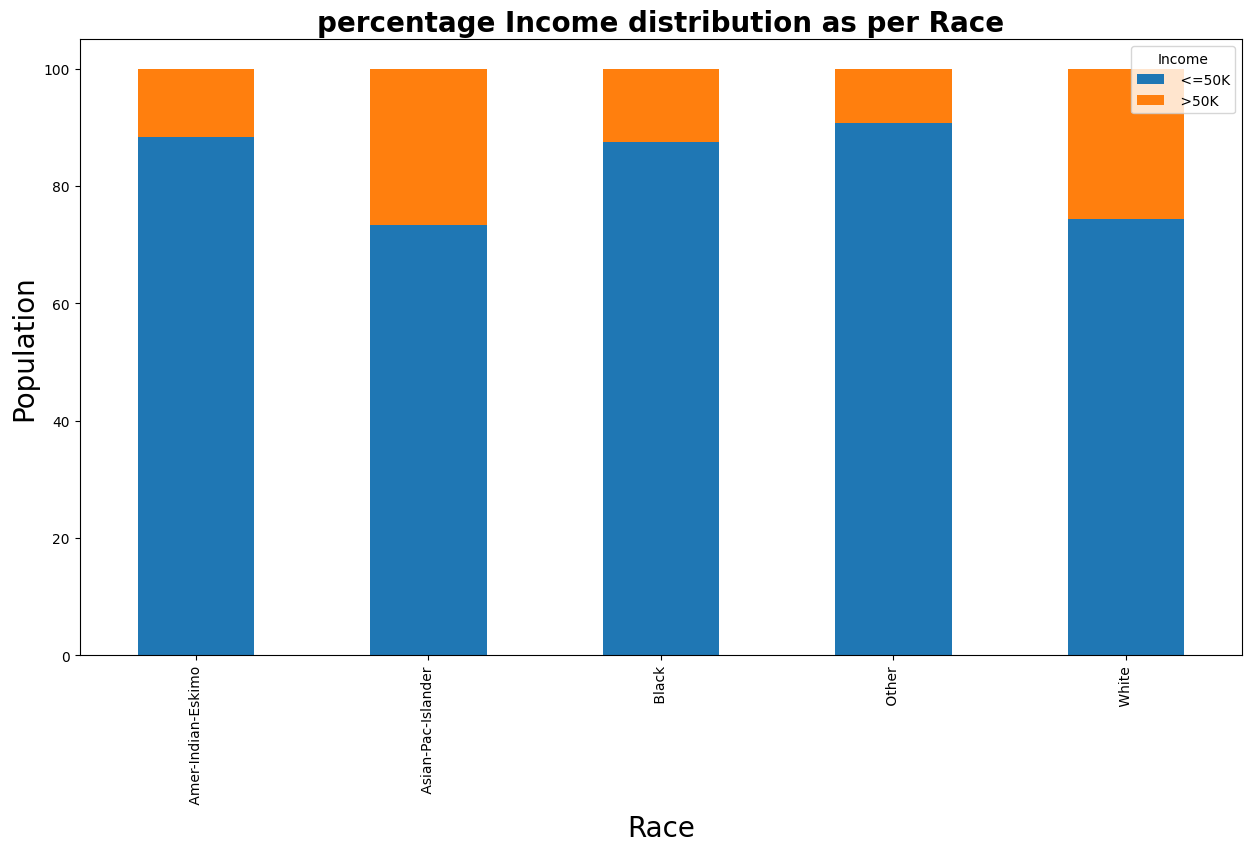

In [53]:
#plt.title("percentage Income distribution as per Race")
table=pd.crosstab(df['Race'],df['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,8))
plt.title("percentage Income distribution as per Race",fontsize=20,fontweight='bold')
plt.xlabel('Race',fontsize=20)
plt.ylabel('Population',fontsize=20)

as per the graph we can see that the people with having income 50k dollar in a year in coming from the race of white and asian-pac-islander

### Sex

<Axes: ylabel='count'>

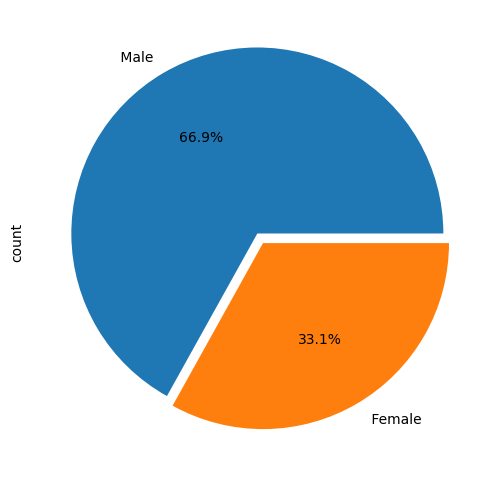

In [54]:
plt.figure(figsize=(6,7))
df['Sex'].value_counts().plot.pie(autopct='%2.1f%%',explode=[0.05,0.010])

<Axes: title={'center': 'Income as per Sex'}, xlabel='Sex', ylabel='count'>

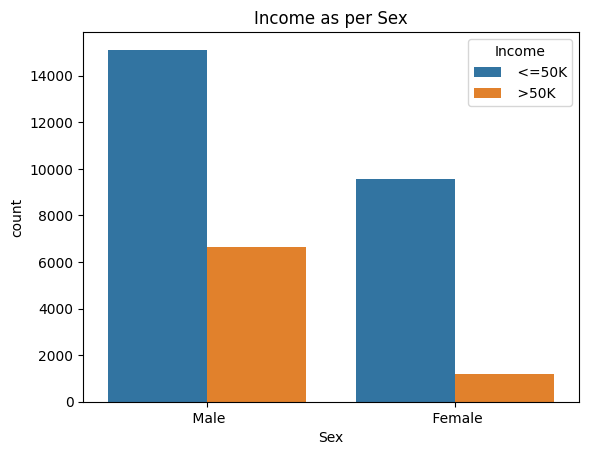

In [55]:
plt.title("Income as per Sex")
sns.countplot(x='Sex',hue='Income',data=df)

In [56]:
pd.crosstab([df.Sex],[df.Income],margins=True)

Income,<=50K,>50K,All
Sex,,,
Female,9583,1179,10762
Male,15114,6660,21774
All,24697,7839,32536


In [57]:
pd.crosstab([df.Occupation],[df.Sex,df.Income],margins=True)

Sex                 Female         Male          All
Income               <=50K  >50K  <=50K  >50K       
Occupation                                          
 Adm-clerical         2323   212    937   295   3767
 Armed-Forces            0     0      8     1      9
 Craft-repair          202    20   2963   909   4094
 Exec-managerial       879   280   1218  1688   4065
 Farming-fishing        63     2    814   113    992
 Handlers-cleaners     160     4   1123    82   1369
 Machine-op-inspct     529    20   1222   229   2000
 Other-service        1748    51   1406    86   3291
 Priv-house-serv       138     1      8     0    147
 Prof-specialty       1917   437   2013  1612   5979
 Protective-serv        66    10    372   201    649
 Sales                1175    88   1492   895   3650
 Tech-support          302    45    342   238    927
 Transport-moving       81     9   1196   311   1597
All                   9583  1179  15114  6660  32536

### Native_Country

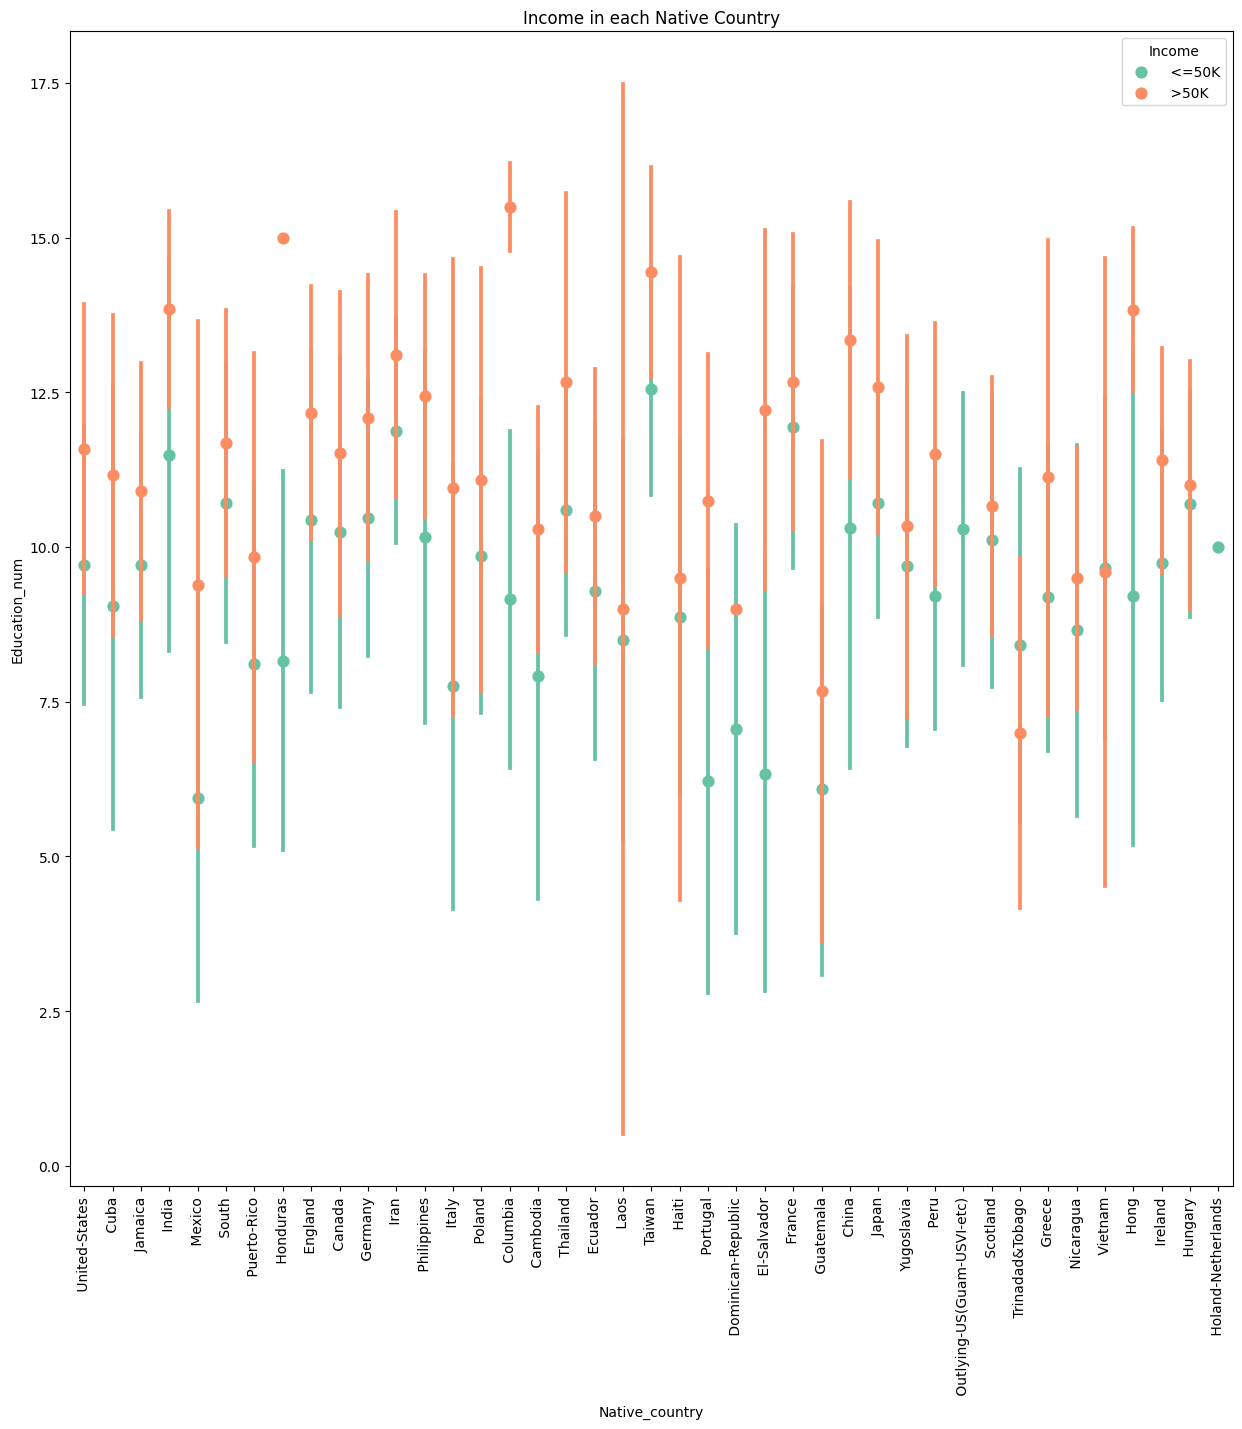

In [58]:
# Visualizing how the income changes for Native country of the people
plt.figure(figsize=(15,15))
plt.title("Income in each Native Country")
sns.pointplot(x='Native_country',y='Education_num',data=df, hue='Income',join=False,palette="Set2",ci="sd")
plt.xticks(rotation=90)
plt.show()

In [59]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### now its time to encode the categorical variable

In [60]:
from sklearn.preprocessing import LabelEncoder

In [61]:
le=LabelEncoder()
for i in cat:
    df[i]=le.fit_transform(df[i])

In [62]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0


## Feature selection and Engineering

In [63]:
# outlier detection and removal
# skewenss detection and removing
# checking co relation 
# checking multicolinearity
# balancing the dataset
# standard Scaling 


##  outliers detection 

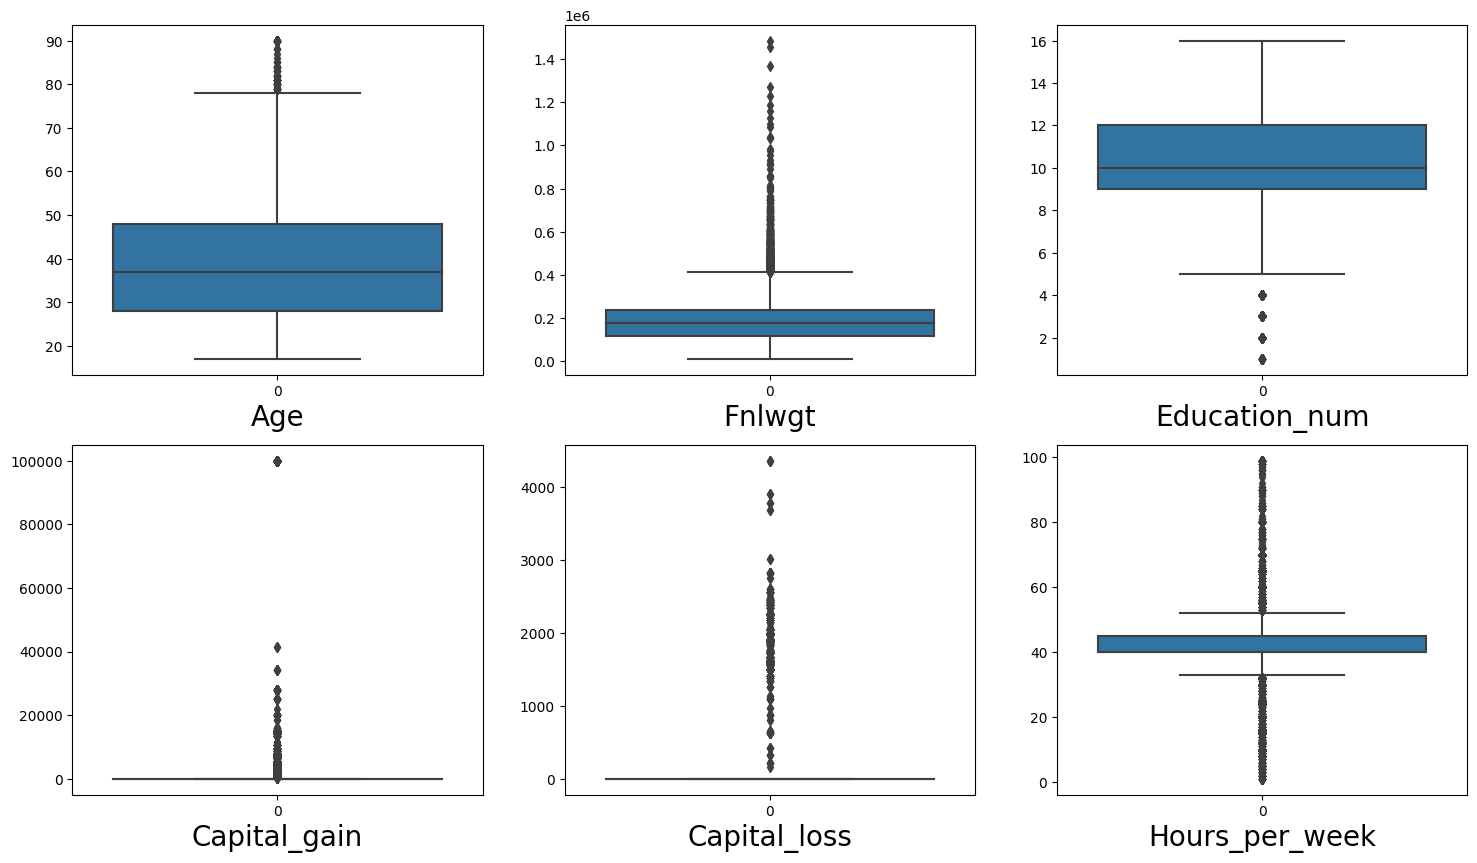

<Figure size 640x480 with 0 Axes>

In [64]:
plt.figure(figsize=(18,10))
p=1
for i in num:
    if p<=6:
        ax=plt.subplot(2,3,p)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize=20)
    p+=1
plt.show()
plt.tight_layout()

In [65]:
# lets remove the outliers by using zscore method

from scipy.stats import zscore

In [66]:
z=np.abs(zscore(df))

In [67]:
df1=df[(z<3).all(axis=1)]

In [68]:
print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (32536, 15)
Shape of the dataframe after removing outliers:  (27751, 15)
Percentage of data loss post outlier removal:  14.706786328989427


threr is little bit more data loss percentage but its good we can move to further steps

## lets check for the skewness and remove if present

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27751 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             27751 non-null  int64
 1   Workclass       27751 non-null  int32
 2   Fnlwgt          27751 non-null  int64
 3   Education       27751 non-null  int32
 4   Education_num   27751 non-null  int64
 5   Marital_status  27751 non-null  int32
 6   Occupation      27751 non-null  int32
 7   Relationship    27751 non-null  int32
 8   Race            27751 non-null  int32
 9   Sex             27751 non-null  int32
 10  Capital_gain    27751 non-null  int64
 11  Capital_loss    27751 non-null  int64
 12  Hours_per_week  27751 non-null  int64
 13  Native_country  27751 non-null  int32
 14  Income          27751 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.4 MB


In [70]:
df.skew()

Age                0.484822
Workclass          0.081802
Fnlwgt             0.629037
Education         -0.955723
Education_num     -0.145695
Marital_status    -0.045059
Occupation         0.013496
Relationship       0.753378
Race              -2.587054
Sex               -0.688876
Capital_gain       4.928795
Capital_loss      29.504415
Hours_per_week    -0.358726
Native_country    -5.411057
Income             1.322128
dtype: float64

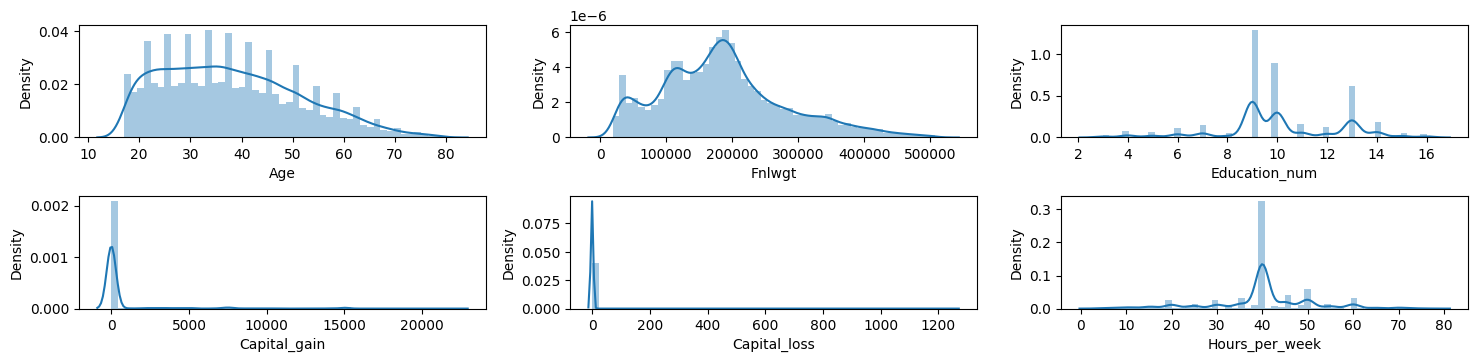

In [71]:
plt.figure(figsize=(15,5))
p=1
for i in num:
    if p<=9:
        plt.subplot(3,3,p)
        sns.distplot(df[i])
    p+=1
plt.tight_layout()

as we can see that fnlwgt,education is object type column so it doesnt mean to change their skewness because its doesnt mean anything

secondly the capital gain and capital loss is numerica column but it having lots of zeroes values so if we transform or reduce the skewness but it wont affect so its better to left the data and move on the colinearity steps

## correlation:

In [72]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.030416,-0.077342,-0.003984,0.044602,-0.286029,-0.001196,-0.270566,0.020581,0.089817,0.132521,0.023470,0.090644,0.035621,0.241574
Workclass,0.030416,1.000000,-0.026825,0.001559,-0.001812,-0.016039,0.008068,-0.057876,0.066438,0.069649,0.011463,-0.010714,0.028328,0.002607,-0.007850
Fnlwgt,-0.077342,-0.026825,1.000000,-0.021254,-0.040000,0.029528,-0.002084,0.015059,-0.102369,0.023150,-0.003736,0.003214,-0.018497,-0.105660,-0.011713
Education,-0.003984,0.001559,-0.021254,1.000000,0.346921,-0.037165,-0.042268,-0.009515,0.026706,-0.031634,0.026657,-0.000323,0.059634,0.091185,0.071005
Education_num,0.044602,-0.001812,-0.040000,0.346921,1.000000,-0.058419,0.072769,-0.092841,0.082854,0.003962,0.157647,0.007343,0.156044,0.147551,0.319622
Marital_status,-0.286029,-0.016039,0.029528,-0.037165,-0.058419,1.000000,0.036733,0.183957,-0.084552,-0.126222,-0.069563,-0.016472,-0.196855,-0.032029,-0.193939
Occupation,-0.001196,0.008068,-0.002084,-0.042268,0.072769,0.036733,1.000000,-0.038658,0.001550,0.050484,0.009435,-0.004829,-0.022046,0.018782,0.030327
Relationship,-0.270566,-0.057876,0.015059,-0.009515,-0.092841,0.183957,-0.038658,1.000000,-0.146544,-0.576987,-0.090042,0.030292,-0.262870,-0.012233,-0.247737
Race,0.020581,0.066438,-0.102369,0.026706,0.082854,-0.084552,0.001550,-0.146544,1.000000,0.125261,0.031085,-0.000082,0.057207,0.021478,0.094979
Sex,0.089817,0.069649,0.023150,-0.031634,0.003962,-0.126222,0.050484,-0.576987,0.125261,1.000000,0.069899,-0.027452,0.236827,-0.009278,0.211544


<Axes: >

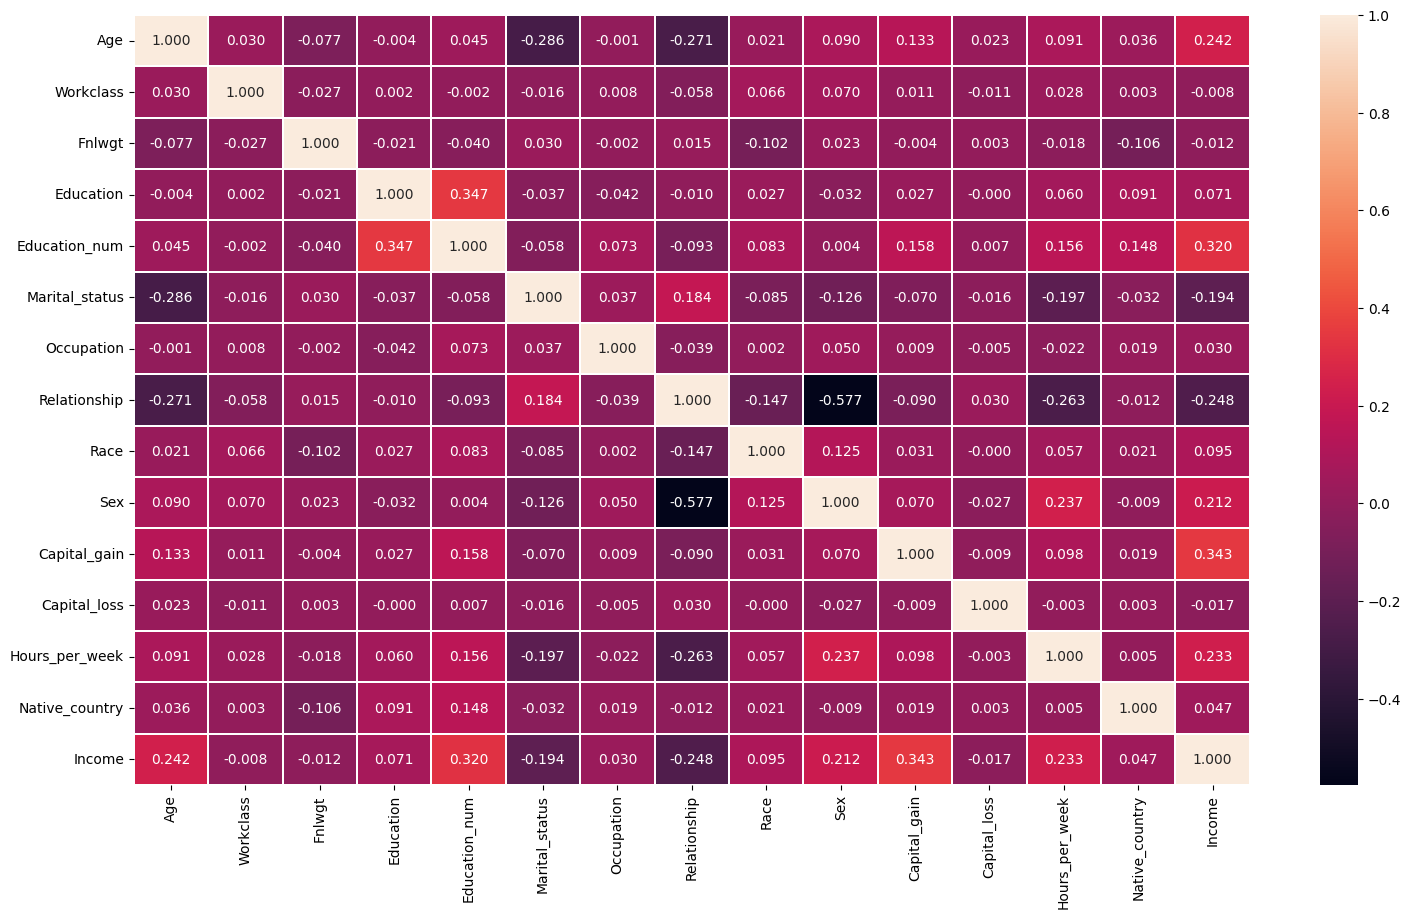

In [73]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True,fmt='0.3f',linewidth=0.01)

<Axes: >

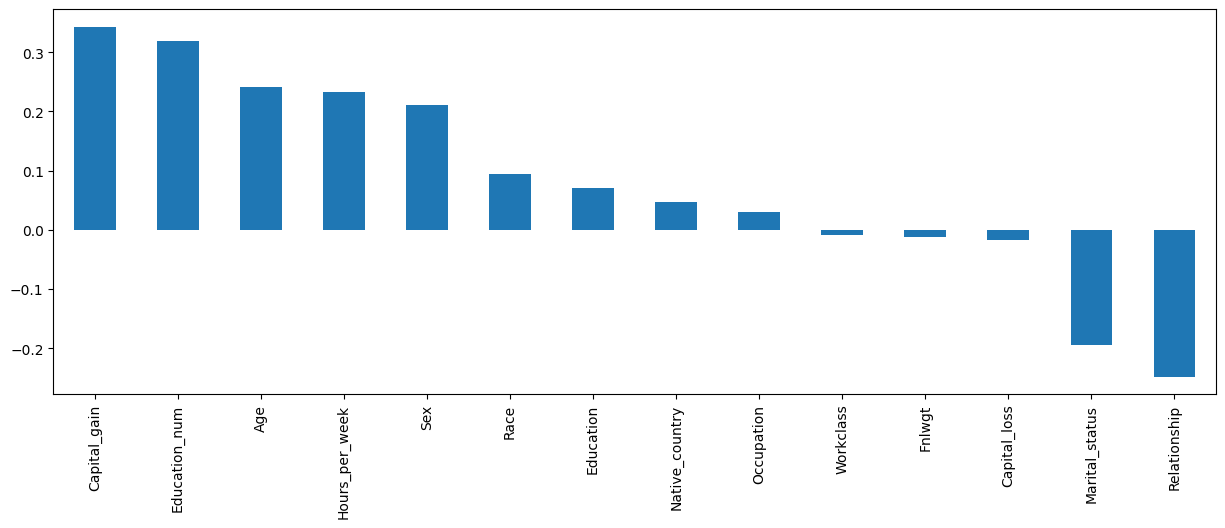

In [74]:
plt.figure(figsize=(15,5))
df.corr()['Income'].drop(['Income']).sort_values(ascending=False).plot(kind='bar')

### checking multicolinearity

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [76]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['features']=df.columns

In [77]:
vif

,VIF,features
0,10.451414,Age
1,8.809700,Workclass
2,4.725712,Fnlwgt
3,9.312008,Education
4,24.037077,Education_num
5,4.372837,Marital_status
6,3.377197,Occupation
7,2.945858,Relationship
8,37.134945,Race
9,4.588603,Sex


as we can see the data is corelated with target variable so we cant remove those column its better to go for the second approach which is applying PCA

before applying PCA we can balance the dataset using SMOTE

In [78]:
from imblearn.over_sampling import SMOTE

now we can seprate the dataset to apply data balancing techinique

In [79]:
X=df.drop(['Income'],axis=1)
Y=df['Income']

In [80]:
print(Y)

0        0
1        0
2        0
4        0
5        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 27751, dtype: int32


In [81]:
print(Y.value_counts())

Income
0    21527
1     6224
Name: count, dtype: int64


as we can see there is data imbalacne so first we can balance the dataset

In [82]:
# oversampling using SMOTE

sm=SMOTE()
X,Y=sm.fit_resample(X,Y)

In [83]:
Y.value_counts()

Income
0    21527
1    21527
Name: count, dtype: int64

## Standard Scaling

In [84]:
#now we can scale the data
from sklearn.preprocessing import StandardScaler

In [85]:
sc=StandardScaler()

In [86]:
X_scale=sc.fit_transform(X)

## PCA

In [87]:
from sklearn.decomposition import PCA

In [88]:
pca=PCA()
x_pca=pca.fit_transform(X_scale)

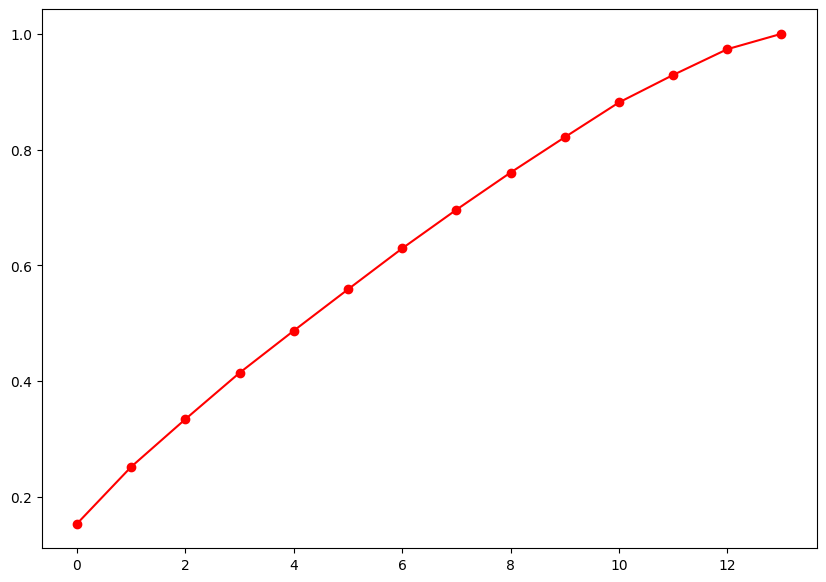

In [89]:
plt.figure(figsize=(10,7))
#plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.plot(np.cumsum(pca.explained_variance_ratio_),  'ro-')

AS per the graph, we can see that 9 principal components attribute for 90% of variation in the data. We shall pick the first 9 components for our prediction.

In [90]:
pca_new = PCA(n_components=9)
x_new = pca_new.fit_transform(X_scale)

In [91]:
principle_x=pd.DataFrame(x_new,columns=np.arange(9))

## Modeling 

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

## finding best random state

In [93]:
maxAccu=0
maxRS=0
for i in range(1,500):
    X_train,X_test,Y_train,Y_test = train_test_split(principle_x,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.7757219168537586 on Random_state 235


### Logistic Regression

In [94]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=483, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.7751799953549586


Confusion matrix of Logistics Regression : 
 [[4909 1562]
 [1342 5104]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.79      0.76      0.77      6471
           1       0.77      0.79      0.78      6446

    accuracy                           0.78     12917
   macro avg       0.78      0.78      0.78     12917
weighted avg       0.78      0.78      0.78     12917



In [95]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(12):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.4071247490338042
RMSE value for k=  2 is: 0.4342679836027643
RMSE value for k=  3 is: 0.4016687340688423
RMSE value for k=  4 is: 0.4133522793404587
RMSE value for k=  5 is: 0.4024389528664414
RMSE value for k=  6 is: 0.40626814428785224
RMSE value for k=  7 is: 0.4012830702890176
RMSE value for k=  8 is: 0.4063634117634935
RMSE value for k=  9 is: 0.40349560308747306
RMSE value for k=  10 is: 0.4090218923422886
RMSE value for k=  11 is: 0.40921112292948436
RMSE value for k=  12 is: 0.4094002660516386


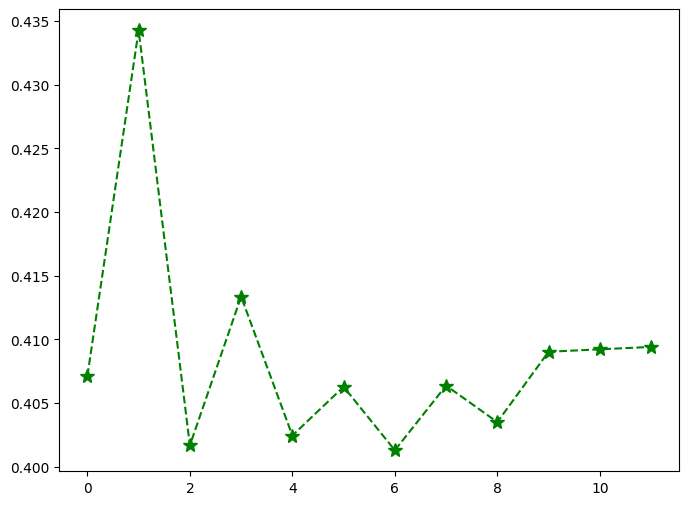

In [96]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(12), rmse_val, color='green', linestyle='dashed', marker='*', markerfacecolor='green', markersize=10)

### Applying other ml models 

In [97]:
model=[ LogisticRegression(),
        SVC(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 5),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('============================================================================================================')

Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score :
 0.7751799953549586


Confusion matrix : 
 [[4909 1562]
 [1342 5104]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.79      0.76      0.77      6471
           1       0.77      0.79      0.78      6446

    accuracy                           0.78     12917
   macro avg       0.78      0.78      0.78     12917
weighted avg       0.78      0.78      0.78     12917



Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8224820004645041


Confusion matrix : 
 [[4901 1570]
 [ 723 5723]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.76      0.81      6471
           1       0.78      0.89      0.83      6446

    accuracy                           0.82     12917
   macro avg       0.83      0.82      0.82     12917
weighted avg       0.83      0.82      0

## cross-validation

In [98]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, principle_x, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.75531297 0.77006155 0.76553246 0.77946812 0.770964  ]
Mean Score : 0.7682678193936907
Std deviation : 0.0078897894727733




Cross Validation Score SVC() :

Score : [0.77517129 0.8162815  0.83312043 0.83044943 0.8358885 ]
Mean Score : 0.8181822294391301
Std deviation : 0.022541958171915094




Cross Validation Score DecisionTreeClassifier() :

Score : [0.71861572 0.76866798 0.80687493 0.79526187 0.80348432]
Mean Score : 0.7785809658418431
Std deviation : 0.03284227610616824




Cross Validation Score KNeighborsClassifier(n_neighbors=3) :

Score : [0.77145512 0.82301707 0.86389502 0.86226919 0.86295006]
Mean Score : 0.8367172906760671
Std deviation : 0.03612903002345419




Cross Validation Score RandomForestClassifier() :

Score : [0.76808733 0.83753339 0.87063059 0.87190802 0.87003484]
Mean Score : 0.8436388348587436
Std deviation : 0.03992432209999759




Cross Validation Score ExtraTreesClassifier() :

Score : [0.77610034 0

## HyperParameter Tuning

In [99]:
from sklearn.model_selection import GridSearchCV
parameter= {'criterion' : ['gini', 'entropy'],
              'min_samples_split':[3,5,8],
              'max_depth' : [20,30,40],
              'n_estimators' : [100, 150, 200]
             }

In [100]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameter,verbose=5)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.834 total time=   1.7s
[CV 2/5] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.840 total time=   1.7s
[CV 3/5] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.844 total time=   1.7s
[CV 4/5] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.829 total time=   1.6s
[CV 5/5] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.832 total time=   1.7s
[CV 1/5] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=150;, score=0.837 total time=   2.6s
[CV 2/5] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=150;, score=0.846 total time=   2.6s
[CV 3/5] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=150;, score=0.845 total time=   2.5s
[CV 4/5] END criterion=gin

[CV 3/5] END criterion=gini, max_depth=30, min_samples_split=5, n_estimators=200;, score=0.853 total time=   4.4s
[CV 4/5] END criterion=gini, max_depth=30, min_samples_split=5, n_estimators=200;, score=0.843 total time=   4.4s
[CV 5/5] END criterion=gini, max_depth=30, min_samples_split=5, n_estimators=200;, score=0.843 total time=   4.1s
[CV 1/5] END criterion=gini, max_depth=30, min_samples_split=8, n_estimators=100;, score=0.844 total time=   1.9s
[CV 2/5] END criterion=gini, max_depth=30, min_samples_split=8, n_estimators=100;, score=0.849 total time=   1.9s
[CV 3/5] END criterion=gini, max_depth=30, min_samples_split=8, n_estimators=100;, score=0.851 total time=   1.9s
[CV 4/5] END criterion=gini, max_depth=30, min_samples_split=8, n_estimators=100;, score=0.838 total time=   1.8s
[CV 5/5] END criterion=gini, max_depth=30, min_samples_split=8, n_estimators=100;, score=0.840 total time=   1.9s
[CV 1/5] END criterion=gini, max_depth=30, min_samples_split=8, n_estimators=150;, score

[CV 5/5] END criterion=entropy, max_depth=20, min_samples_split=3, n_estimators=150;, score=0.832 total time=   2.6s
[CV 1/5] END criterion=entropy, max_depth=20, min_samples_split=3, n_estimators=200;, score=0.837 total time=   3.5s
[CV 2/5] END criterion=entropy, max_depth=20, min_samples_split=3, n_estimators=200;, score=0.843 total time=   3.5s
[CV 3/5] END criterion=entropy, max_depth=20, min_samples_split=3, n_estimators=200;, score=0.844 total time=   3.6s
[CV 4/5] END criterion=entropy, max_depth=20, min_samples_split=3, n_estimators=200;, score=0.829 total time=   3.5s
[CV 5/5] END criterion=entropy, max_depth=20, min_samples_split=3, n_estimators=200;, score=0.832 total time=   3.5s
[CV 1/5] END criterion=entropy, max_depth=20, min_samples_split=5, n_estimators=100;, score=0.835 total time=   1.5s
[CV 2/5] END criterion=entropy, max_depth=20, min_samples_split=5, n_estimators=100;, score=0.840 total time=   1.6s
[CV 3/5] END criterion=entropy, max_depth=20, min_samples_split=

[CV 1/5] END criterion=entropy, max_depth=30, min_samples_split=8, n_estimators=150;, score=0.846 total time=   3.2s
[CV 2/5] END criterion=entropy, max_depth=30, min_samples_split=8, n_estimators=150;, score=0.849 total time=   3.2s
[CV 3/5] END criterion=entropy, max_depth=30, min_samples_split=8, n_estimators=150;, score=0.852 total time=   3.2s
[CV 4/5] END criterion=entropy, max_depth=30, min_samples_split=8, n_estimators=150;, score=0.841 total time=   3.2s
[CV 5/5] END criterion=entropy, max_depth=30, min_samples_split=8, n_estimators=150;, score=0.840 total time=   3.2s
[CV 1/5] END criterion=entropy, max_depth=30, min_samples_split=8, n_estimators=200;, score=0.845 total time=   4.3s
[CV 2/5] END criterion=entropy, max_depth=30, min_samples_split=8, n_estimators=200;, score=0.849 total time=   4.3s
[CV 3/5] END criterion=entropy, max_depth=30, min_samples_split=8, n_estimators=200;, score=0.852 total time=   4.3s
[CV 4/5] END criterion=entropy, max_depth=30, min_samples_split=

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 30, 40],
                         'min_samples_split': [3, 5, 8],
                         'n_estimators': [100, 150, 200]},
             verbose=5)

In [101]:
GCV.best_params_


{'criterion': 'entropy',
 'max_depth': 40,
 'min_samples_split': 3,
 'n_estimators': 200}

###  Final Model

In [102]:
Final_mod = ExtraTreesClassifier(criterion='entropy',n_estimators= 200, max_depth=40 ,min_samples_split= 3)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))



Accuracy Score :
 0.8553843771773632


In [103]:
from scikitplot.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay

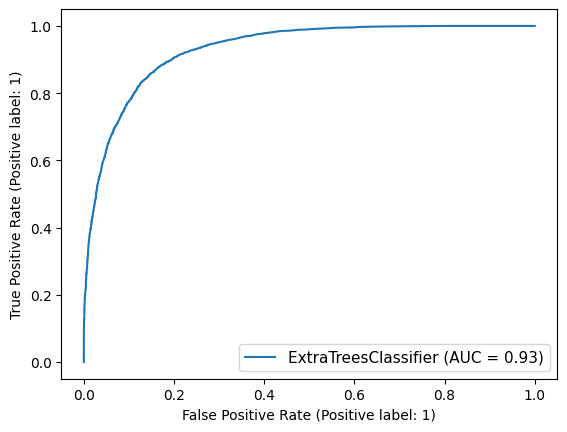

<Figure size 1000x1000 with 0 Axes>

Auc Score :
 0.855440473746853


In [104]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
#from sklearn.metrics import plot_roc_curve
disp =RocCurveDisplay.from_estimator(Final_mod,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.figure(figsize=(10,10))
plt.show()
plt.show()
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

### confusion_matrix

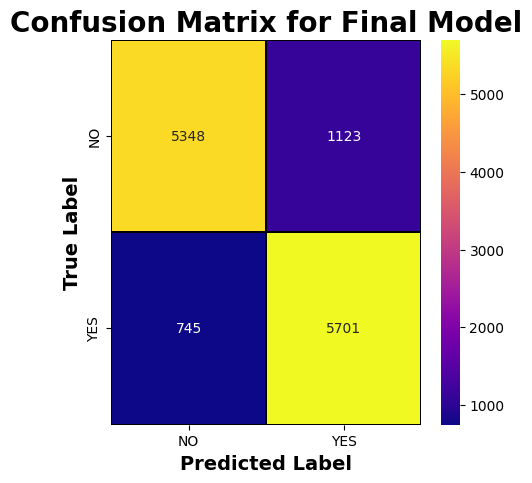

In [105]:
# Lets plot confusion matrix for  FinalModel
Matrix = confusion_matrix(Y_test, y_pred)

x_labels = ["NO","YES"]
y_labels = ["NO","YES"]

fig , ax = plt.subplots(figsize=(5,5))
sns.heatmap(Matrix, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, 
            cmap="plasma", xticklabels = x_labels, yticklabels = y_labels)

plt.xlabel("Predicted Label",fontsize=14,fontweight='bold')
plt.ylabel("True Label",fontsize=14,fontweight='bold')
plt.title('Confusion Matrix for Final Model',fontsize=20,fontweight='bold')
plt.show()

### Saving Model

In [106]:
import joblib
joblib.dump(Final_mod,'Census_Income_Final.pkl')

['Census_Income_Final.pkl']